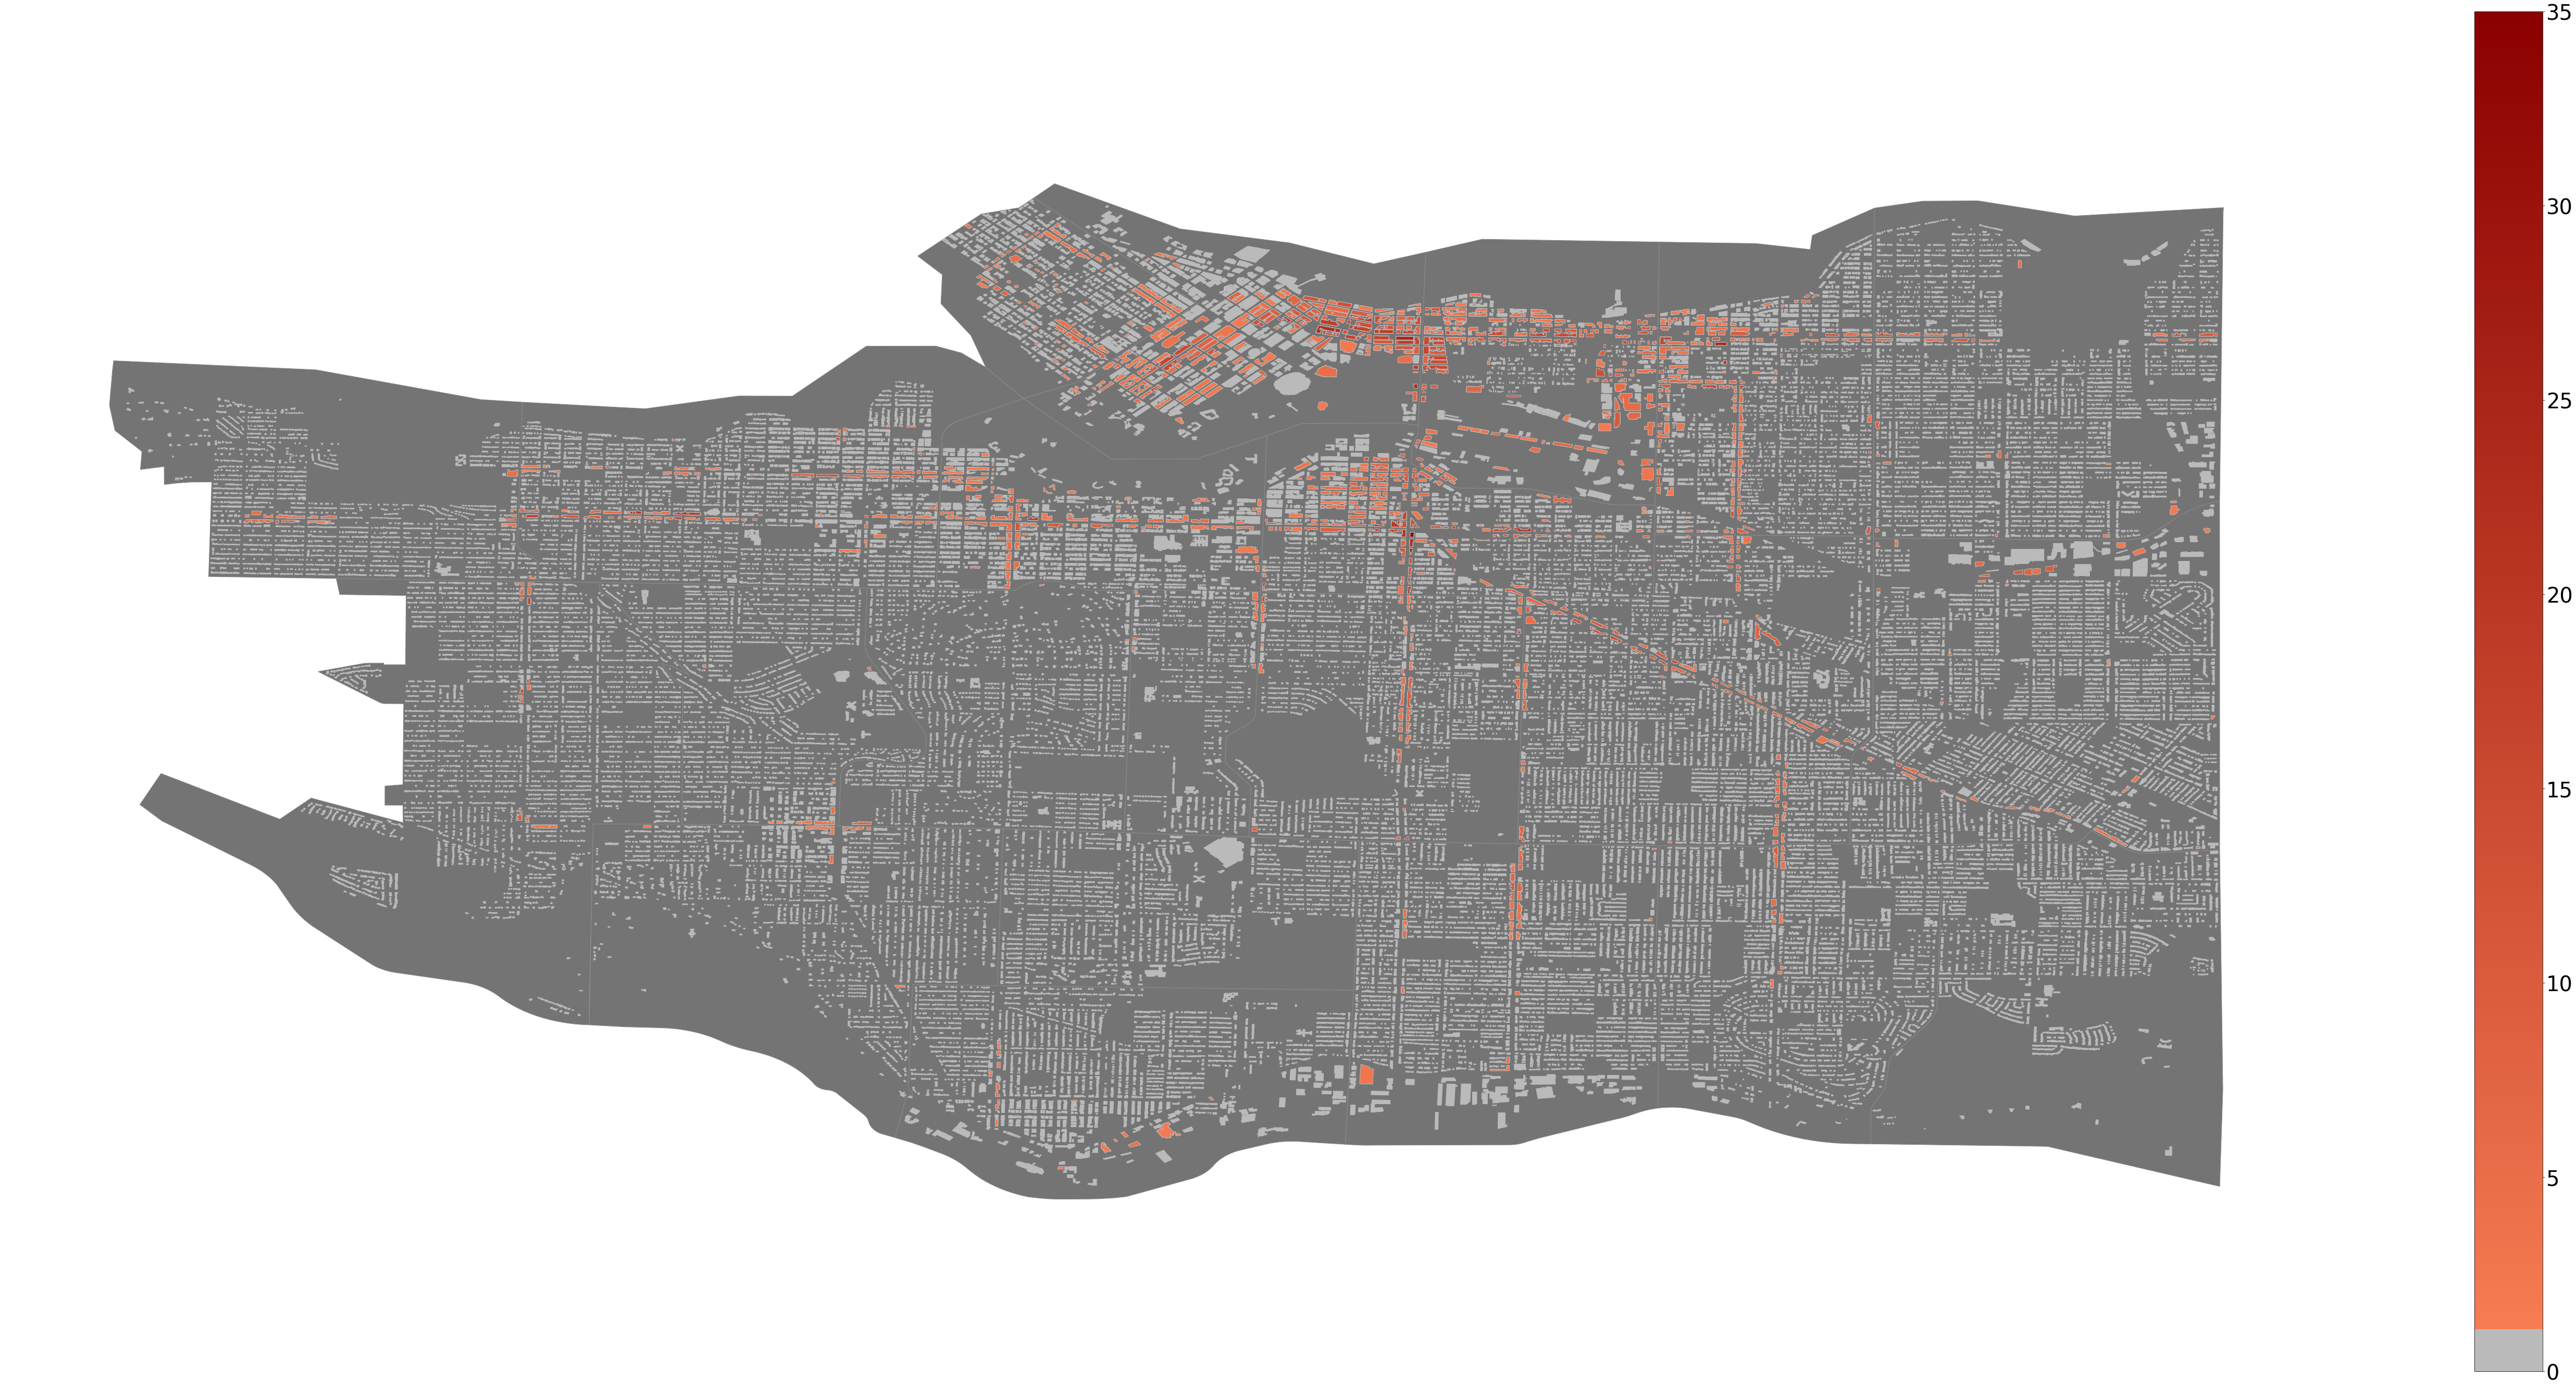

In [22]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
from shapely.geometry import shape
import json
import argparse
import seaborn as sns

width_inches = 100
feature_to_plot = 'graffiti_count'

colours = sns.color_palette("gray", 10)

vancouver_colour = colours[4]
edge_colour = colours[5]
buildings_colour = colours[7]

vancouver = gpd.read_file('../resources/data/original/local-area-boundary.csv')
vancouver['geometry'] = [shape(json.loads(x)) for x in vancouver['Geom']]
buildings \
    = gpd.read_file('../resources/data/generated/buildings_all_features.csv')
buildings['geometry'] \
    = [shape(json.loads(x)) for x in buildings['building_polygon']]

buildings[feature_to_plot] = buildings[feature_to_plot].astype(float)

# custom colourmap
norm = matplotlib.colors.Normalize(0, buildings[feature_to_plot].max())
colors = [
    [norm(0), buildings_colour],
    [norm(0.99), buildings_colour],
    [norm(1), (246 / 255, 124 / 255, 82 / 255)],
    [norm(buildings[feature_to_plot].max()), "darkred"]
]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig, ax = plt.subplots()
fig.set_size_inches(width_inches, width_inches / x_difference * y_difference)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
vancouver.plot(
    ax=ax,
    edgecolor=edge_colour,
    facecolor=vancouver_colour,
    antialiased=True,
)
buildings = buildings.sort_values(feature_to_plot)
buildings.plot(
    ax=ax,
    edgecolor=buildings_colour,
    antialiased=True,
    column=feature_to_plot,
    legend=True,
    cmap=cmap,
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_difference = xlim[1] - xlim[0]
y_difference = ylim[1] - ylim[0]

fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=40)

fig.savefig(
    f'../resources/images/vancouver_buildings_heatmap_{feature_to_plot}.png',
    bbox_inches='tight',
    transparent="False",
    pad_inches=0.4
)